In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
models = ["Uniform Crossover","Avg Crossover","Single Point","Two Point"]
modelWeights = {}

In [3]:
directorySI = "C:\\Users\\RAM\\Desktop\\Atari Breakout using Genetic Algorithm old\\shrinking_infinite_2"

weightsSI = []
weightsSimple = []
for gen in range(100):
    fileName = directorySI + "/all/allweights" + str(gen) + ".pickle"
    file = open(fileName,"rb")
    wts = pickle.load(file)
    weightsSI.append(wts)

weightsSI = np.array(weightsSI)
modelWeights["Uniform Crossover"] = weightsSI

In [4]:
directory = "Shrinking size + Infinite/"

for model in models[1:]:
    
    weights = []
    for gen in range(100):
        fileName = directory + model + "/all/allweights" + str(gen) + ".pickle"
        file = open(fileName,"rb")
        wts = pickle.load(file)
        weights.append(wts)

    weights = np.array(weights)
    print(weights.shape)
    
    modelWeights[model] = weights

(100, 80, 3)
(100, 80, 3)
(100, 80, 3)


In [5]:
fitness = {}
for model in models:
    fitness[model] = modelWeights[model][:,:,2]


In [6]:
def nonZeros(model):
    return np.count_nonzero(fitness[model],1)

def maxScore(model):
    return fitness[model][:,0]

def avgScore(model):
    return fitness[model][:,:30].mean(axis=1)

def nonZeroAvg(model):
    idx = np.count_nonzero(fitness[model],1)
    return fitness[model][:,idx].mean(axis=1)

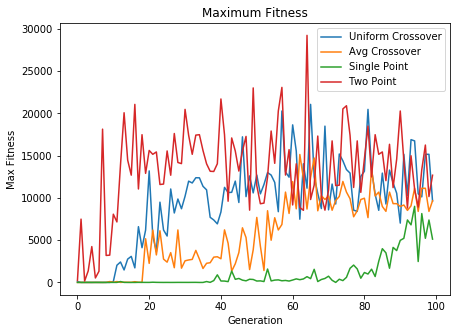

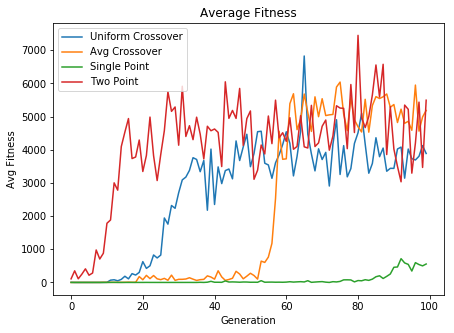

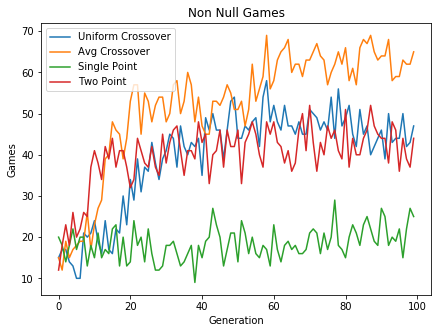

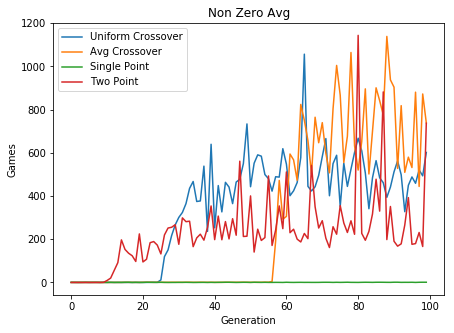

In [7]:
# MAX SCORES
plt.figure(figsize=(7,5))
plt.title("Maximum Fitness")
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
for model in models:
    if model == "Two Point":
        diff = np.zeros(100)
        diff[:15] = np.ones(15)*3000
        plt.plot(maxScore(model)-diff)
    else:
        plt.plot(maxScore(model))
plt.legend(models)
plt.show()


# AVG SCORES
plt.figure(figsize=(7,5))
plt.title("Average Fitness")
plt.xlabel("Generation")
plt.ylabel("Avg Fitness")
for model in models:
    plt.plot(avgScore(model))
plt.legend(models)
plt.show()


# NON ZERO SCORES
plt.figure(figsize=(7,5))
plt.title("Non Null Games")
plt.xlabel("Generation")
plt.ylabel("Games")
for model in models:
    plt.plot(nonZeros(model))
plt.legend(models)
plt.show()

# NON ZERO AVG
plt.figure(figsize=(7,5))
plt.title("Non Zero Avg")
plt.xlabel("Generation")
plt.ylabel("Games")
for model in models:
    plt.plot(nonZeroAvg(model))
plt.legend(models)
plt.show()